In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import time
import datetime

from langdetect import detect

pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_columns', 500)

In [7]:
#reading the previously saved dataframe
df = pd.read_csv('sentiment_df_eng')

VISUALIZATION OF VADER RESULTS

Text(0.5, 1.0, 'Compound Sentiment Score')

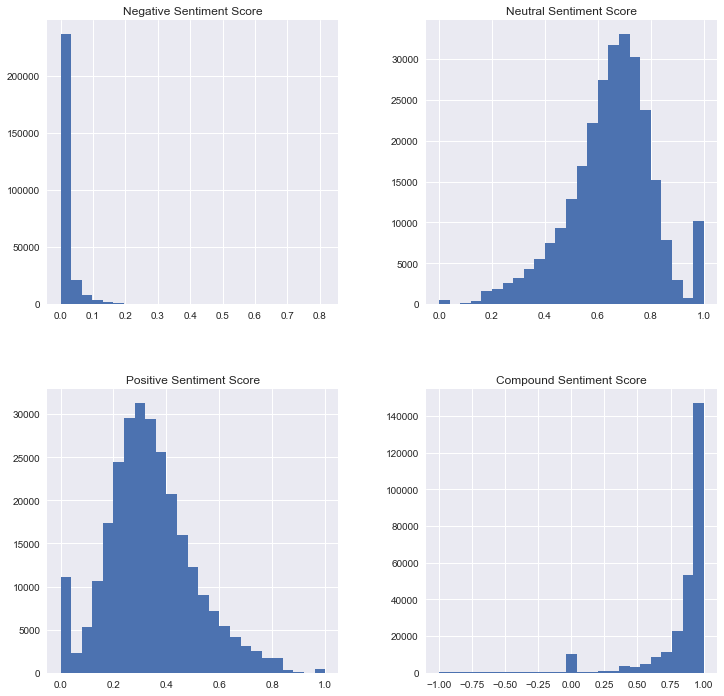

In [15]:
#neg, neu, pos and compound score in histograms
fig, axes = plt.subplots(2,2, figsize=(12,12))

#plotting
df.hist('sentiment_neg', bins=25, ax=axes[0,0])
axes[0,0].set_title('Negative Sentiment Score')
df.hist('sentiment_neu', bins=25, ax=axes[0,1])
axes[0,1].set_title('Neutral Sentiment Score')
df.hist('sentiment_pos', bins=25, ax=axes[1,0])
axes[1,0].set_title('Positive Sentiment Score')
df.hist('sentiment_compound', bins=25, ax=axes[1,1])
axes[1,1].set_title('Compound Sentiment Score')

In [17]:
#closer look at percentiles of compound score
percentiles = df['sentiment_compound'].describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
percentiles

count    271824.000000
mean          0.831637
std           0.261952
min          -0.996800
5%            0.051600
10%           0.585900
20%           0.784900
30%           0.862000
40%           0.903200
50%           0.928700
60%           0.946800
70%           0.960800
80%           0.972100
90%           0.982500
max           0.999500
Name: sentiment_compound, dtype: float64

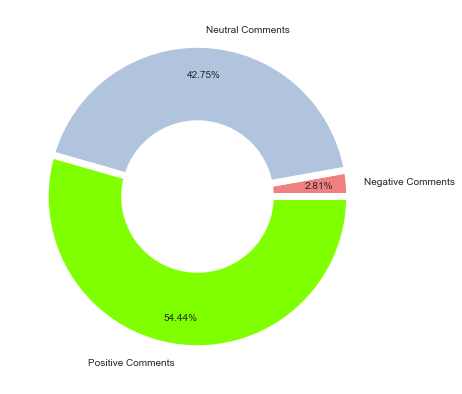

In [38]:
#assign data
neg = percentiles['5%']
mid = percentiles['20%']
pos = percentiles['max']
names = ['Negative Comments', 'Neutral Comments','Positive Comments']
size = [neg, mid, pos]

plt.pie(size, labels=names, colors=['lightcoral', 'lightsteelblue', 'chartreuse'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' });

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.5, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

#in the data that we have most of the comments are positive or neutral

In [41]:
# full dataframe with POSITIVE comments
df_pos = df.loc[df.sentiment_compound >= 0.95]

# only corpus of POSITIVE comments
pos_comments = df_pos['comments'].tolist()

In [39]:
# full dataframe with NEGATIVE comments
df_neg = df.loc[df.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
neg_comments = df_neg['comments'].tolist()

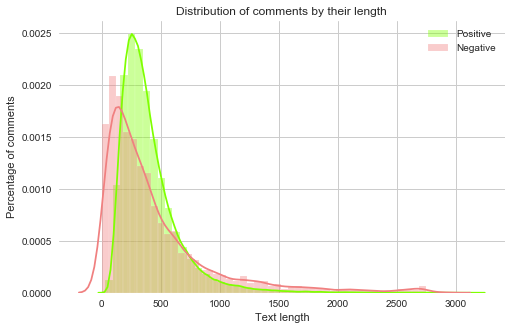

In [46]:
#checking the length of positive/negative comments
df_pos['text_length'] = df_pos['comments'].apply(len)
df_neg['text_length'] = df_neg['comments'].apply(len)

#seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))

sns.distplot(df_pos['text_length'], kde=True, bins=50, color='chartreuse')
sns.distplot(df_neg['text_length'], kde=True, bins=50, color='lightcoral')

plt.title('Distribution of comments by their length')
plt.legend(['Positive', 'Negative'])
plt.xlabel('Text length')
plt.ylabel('Percentage of comments');

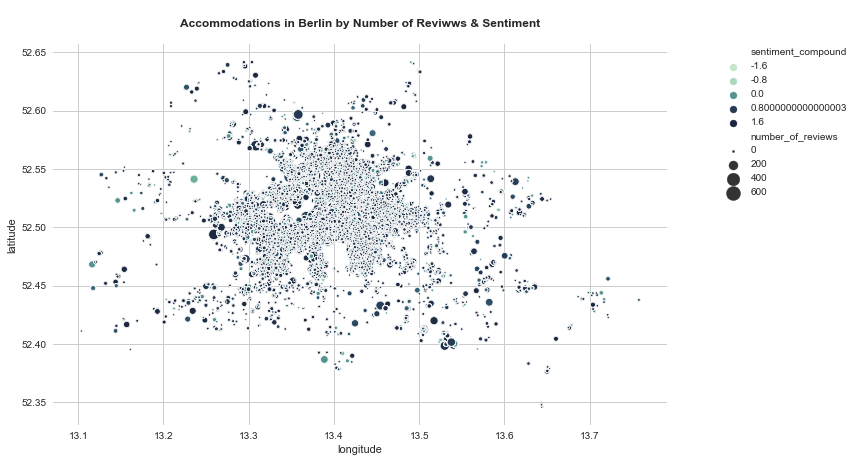

In [47]:
#checking if some districts have better reviews than others
sns.set_style('whitegrid')
cmap = sns.cubehelix_palette(rot=-.4, as_cmap=True)
fig, ax = plt.subplots(figsize=(11,7))

ax = sns.scatterplot(x='longitude', y='latitude', size='number_of_reviews', sizes=(5, 200),
                     hue='sentiment_compound', palette=cmap,  data=df)
ax.legend(bbox_to_anchor=(1.3, 1), borderaxespad=0.)
plt.title('\nAccommodations in Berlin by Number of Reviwws & Sentiment\n', fontsize=12, fontweight='bold')

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);